In [ ]:
# pip install --upgrade gensim

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install koreanize-matplotlib
# import koreanize_matplotlib

# %config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from gensim.models import doc2vec
from gensim.models.doc2vec import TaggedDocument

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0, flags=flags)


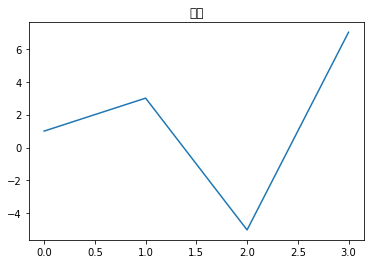

In [ ]:
pd.Series([1, 3, -5, 7]).plot(title="한글")

In [ ]:
news20= pd.read_csv("반려동물_2020.01.01_2020.12.31_1.csv")
news20.head(5)

,기사 제목
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소
3,"“우리 아이와 반려동물, 함께 생활해도 괜찮을까?”"
4,"[영상]반려동물 식품의 세계화 ""정부지원 받아 글로벌기업으로 우뚝"""


In [ ]:
news21= pd.read_csv("반려동물_2021.01.01_2021.12.31_1.csv")
news21.head(5)

,기사 제목
0,이재명 코로나 거점 전담병원 방문…‘반려동물’ 유튜브 출연
1,반려동물 함께 즐기는 스타벅스 더북한강R 점 오픈
2,"잔인한 방법으로 개 도살, 허가 없이 번식도…동물 학대 적발"
3,"반려동물도 코로나 감염…""확진자 재택치료시 분리해야"""
4,올해 최다 이용 반려동물 앱 1위는 펫프렌즈


In [ ]:
news22= pd.read_csv("반려동물_2022.01.01_2022.12.25_1.csv")
news22.head(5)

,기사 제목
0,"尹대통령, 은퇴 안내견 입양…관저에 11번째 동물 식구(종합)"
1,"윤 대통령 부부, 은퇴 안내견 '새롬이' 입양… 11번째 반려동물"
2,'동물복지 조례·보호센터 직영 운영'…사람과 동물이 행복한 고양시
3,[영상]부산 1호 반려동물 테마파크...주민들이 반대하는 이유
4,[정치톡톡] 정치권 성탄 메시지 / '민주당의 길' 출범 / 대통령 11번째 반려동...


In [ ]:
kipris = pd.read_csv("kipris.csv")
kipris.head(5)

,대표도면,출원번호,발명의명칭,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록번호,등록일자,공개번호,공개일자
0,NaN,1020210147821,반려동물용 항산화 보조제 및 그 제조 방법(antioxidant supplement...,antioxidant supplements for companion animal a...,등록,A23K 20/10|A23K 50/40|A61K 9/48|A23K 20/158|A2...,(주)한국반려동물영양연구소,문춘오,정설령,2021.11.01,1.024582e+12,2022.10.19,NaN,NaN
1,NaN,1020190100688,스마트폰을 이용한 반려동물 미용샵 예약관리 시스템 및 방법(RESERVATION S...,RESERVATION SYSTEM AND METHOD FOR A PET BEAUTY...,거절,G06Q 50/10|G06Q 10/02|G06Q 30/02|G06Q 50/30|G0...,주식회사 펫미,우정연,백영호,2019.08.18,NaN,NaN,1.020210e+12,2021.02.26
2,NaN,1020200081386,"반려동물의 3D 복원 및 감정 분석을 통한 컨텐츠 제공 서버, 사용자 단말 및 그 ...",SERVER AND USER EQUIPMENT FOR PROVIDING CONTEN...,등록,G06T 7/55|G06T 7/194|G06T 13/40|G06T 11/60|G06...,주식회사 엘지유플러스,특허법인 무한,유한규,2020.07.02,1.024808e+12,2022.12.20,1.020220e+12,2022.01.11
3,NaN,1020210044524,딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치(A method and el...,A method and electronic device for distinguish...,공개,G16H 50/70|G16H 50/20|G16H 30/40|G16H 30/20|G0...,주식회사 알파도,박수영,지영호,2021.04.06,NaN,NaN,1.020220e+12,2022.10.14
4,NaN,1020220060339,스마트 반려동물 배변패드 처리장치(Smart companion animal defe...,Smart companion animal defecation pad disposal...,등록,A01K 1/01|A01K 23/00,충북대학교 산학협력단,김정현,이아연|구승회,2022.05.17,1.024807e+12,2022.12.20,NaN,NaN


In [ ]:
news20.shape,news21.shape, news22.shape,kipris.shape

((4000, 1), (4000, 1), (4000, 1), (7481, 14))

In [ ]:
import re

def preprocessing(text):
    text = re.sub('\\\\n', ' ', text)
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]',' ',text)
    text = re.sub('[\s]+',' ',text)
    text = text.lower()
    return text

In [ ]:
text = '전처리 확~~인용 0-9 aZ!@'
preprocessing(text)

'전처리 확 인용 az '

In [ ]:
from tqdm import tqdm
tqdm.pandas()

news20["기사 제목"] = news20["기사 제목"].progress_map(preprocessing)
news21["기사 제목"] = news21["기사 제목"].progress_map(preprocessing)
news22["기사 제목"] = news22["기사 제목"].progress_map(preprocessing)
kipris["발명의명칭"] = kipris["발명의명칭"].progress_map(preprocessing)

100%|██████████| 7481/7481 [00:00<00:00, 57282.00it/s]


In [ ]:
display(news20)
display(news21)
display(news22)
display(kipris)

,기사 제목
0,은평구 반려동물 문화교실 댕댕이 스쿨 운영
1,새해부터 반려동물 미용사 나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소
3,우리 아이와 반려동물 함께 생활해도 괜찮을까
4,영상 반려동물 식품의 세계화 정부지원 받아 글로벌기업으로 우뚝
...,...
3995,고양이 분양샵 가필드고양이 반려인 분양비용 부담 줄인 무료분양 진행
3996,남아공 반려동물을 위한 상품 트렌드
3997,곡성군 또 하나의 가족 반려동물 무선식별 장치 지원
3998,프리미엄 카시트 브랜드 폴레드 아이와 반려동물의 공간 위한 브랜드 폴레


,기사 제목
0,이재명 코로나 거점 전담병원 방문 반려동물 유튜브 출연
1,반려동물 함께 즐기는 스타벅스 더북한강r 점 오픈
2,잔인한 방법으로 개 도살 허가 없이 번식도 동물 학대 적발
3,반려동물도 코로나 감염 확진자 재택치료시 분리해야
4,올해 최다 이용 반려동물 앱 위는 펫프렌즈
...,...
3995,부산시 펫 복합테마파크 등 반려동물 산업 육성
3996,개 팔자가 상팔자 반려동물 위해 비즈니스석 끊고 전용기 띄우고
3997,재난 때 반려동물도 구호 법안 국회 통과될까
3998,안전기준 위반 반려동물 사료 억원어치 유통


,기사 제목
0,대통령 은퇴 안내견 입양 관저에 번째 동물 식구 종합
1,윤 대통령 부부 은퇴 안내견 새롬이 입양 번째 반려동물
2,동물복지 조례 보호센터 직영 운영 사람과 동물이 행복한 고양시
3,영상 부산 호 반려동물 테마파크 주민들이 반대하는 이유
4,정치톡톡 정치권 성탄 메시지 민주당의 길 출범 대통령 번째 반려동
...,...
3995,신문브리핑 반려동물 화장장 찬반 팽팽 외 주요기사
3996,정부 반려동물 이동식 화장서비스 등 허용
3997,수원시 반려동물 문화교실 참여자 선착순 모집
3998,펫푸드협회 반려동물 장수 위한 펫푸드 팁 소개


,대표도면,출원번호,발명의명칭,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록번호,등록일자,공개번호,공개일자
0,NaN,1020210147821,반려동물용 항산화 보조제 및 그 제조 방법 antioxidant supplement...,antioxidant supplements for companion animal a...,등록,A23K 20/10|A23K 50/40|A61K 9/48|A23K 20/158|A2...,(주)한국반려동물영양연구소,문춘오,정설령,2021.11.01,1.024582e+12,2022.10.19,NaN,NaN
1,NaN,1020190100688,스마트폰을 이용한 반려동물 미용샵 예약관리 시스템 및 방법 reservation s...,RESERVATION SYSTEM AND METHOD FOR A PET BEAUTY...,거절,G06Q 50/10|G06Q 10/02|G06Q 30/02|G06Q 50/30|G0...,주식회사 펫미,우정연,백영호,2019.08.18,NaN,NaN,1.020210e+12,2021.02.26
2,NaN,1020200081386,반려동물의 d 복원 및 감정 분석을 통한 컨텐츠 제공 서버 사용자 단말 및 그 방법...,SERVER AND USER EQUIPMENT FOR PROVIDING CONTEN...,등록,G06T 7/55|G06T 7/194|G06T 13/40|G06T 11/60|G06...,주식회사 엘지유플러스,특허법인 무한,유한규,2020.07.02,1.024808e+12,2022.12.20,1.020220e+12,2022.01.11
3,NaN,1020210044524,딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치 a method and el...,A method and electronic device for distinguish...,공개,G16H 50/70|G16H 50/20|G16H 30/40|G16H 30/20|G0...,주식회사 알파도,박수영,지영호,2021.04.06,NaN,NaN,1.020220e+12,2022.10.14
4,NaN,1020220060339,스마트 반려동물 배변패드 처리장치 smart companion animal defe...,Smart companion animal defecation pad disposal...,등록,A01K 1/01|A01K 23/00,충북대학교 산학협력단,김정현,이아연|구승회,2022.05.17,1.024807e+12,2022.12.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,NaN,1020180146024,맞춤형 추천 서비스를 제공하는 온라인 판매 방법 online selling meth...,ONLINE SELLING METHOD PROVIDING CUSTOMIZED REF...,등록,G06Q 30/06|G06Q 30/02|G06Q 50/10,㈜펫박스,정성태,이현석|장현민,2018.11.23,1.021219e+12,2020.06.05,1.020200e+12,2020.06.03
7477,NaN,1020180054839,자동 물내림 장치 automatic toilet flushing device,Automatic toilet flushing device,등록,E03D 5/10,백승일,NaN,백승일,2018.05.14,1.020579e+12,2019.12.16,1.020180e+12,2018.06.01
7478,NaN,1020210003701,보호자정보에 기반한 동물 통합 관리서버 및 그 동물 통합 관리방법 animal in...,ANIMAL INTEGRATION MANAGEMENT SERVER AND METHO...,등록,G06Q 50/22|G06Q 30/02|G06Q 50/30|G06Q 30/06|G0...,박종호|백진현,진천웅|특허법인필앤온지|정종옥,박종호|백진현,2021.01.12,1.024583e+12,2022.10.19,1.020210e+12,2021.08.27
7479,NaN,1020200099362,애완동물 리드줄 제어장치 및 방법 method and apparatus for co...,Method and Apparatus for controlling Pet Lead ...,등록,A01K 27/00|A01K 15/02|A01K 11/00|G01L 5/10|H04...,심대보,특허법인비엘티,심대보,2020.08.07,1.024426e+12,2022.09.06,1.020220e+12,2022.02.15


In [ ]:
import jpype
from konlpy.tag import Kkma

In [ ]:
kkma = Kkma()

def tokenizer_kkma(doc):
    jpype.attachThreadToJVM()
    token_doc = ["/".join(word) for word in kkma.pos(doc)]
    return token_doc

In [ ]:
news20

,기사 제목
0,은평구 반려동물 문화교실 댕댕이 스쿨 운영
1,새해부터 반려동물 미용사 나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소
3,우리 아이와 반려동물 함께 생활해도 괜찮을까
4,영상 반려동물 식품의 세계화 정부지원 받아 글로벌기업으로 우뚝
...,...
3995,고양이 분양샵 가필드고양이 반려인 분양비용 부담 줄인 무료분양 진행
3996,남아공 반려동물을 위한 상품 트렌드
3997,곡성군 또 하나의 가족 반려동물 무선식별 장치 지원
3998,프리미엄 카시트 브랜드 폴레드 아이와 반려동물의 공간 위한 브랜드 폴레


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()
dtm = cvect.fit_transform(news20["기사 제목"])
dtm

<4000x6708 sparse matrix of type '<class 'numpy.int64'>'
	with 27220 stored elements in Compressed Sparse Row format>

In [ ]:
feature_names = cvect.get_feature_names_out()
feature_names

array(['abc뉴스', 'ai', 'ai난임센터', ..., '힘들어마세요', '힘쓴', '힘주는'], dtype=object)

In [ ]:
cvect.vocabulary_

{'은평구': 4443,
 '반려동물': 2278,
 '문화교실': 2139,
 '댕댕이': 1424,
 '스쿨': 3440,
 '운영': 4271,
 '새해부터': 3043,
 '미용사': 2186,
 '나무의사도': 1044,
 '신중년': 3594,
 '고용장려금': 594,
 '받는다': 2410,
 '반려식물로': 2380,
 '코로나': 5763,
 '우울': 4258,
 '해소': 6438,
 '우리': 4243,
 '아이와': 3716,
 '함께': 6383,
 '생활해도': 3083,
 '괜찮을까': 730,
 '영상': 4070,
 '식품의': 3566,
 '세계화': 3224,
 '정부지원': 5003,
 '받아': 2411,
 '글로벌기업으로': 870,
 '우뚝': 4241,
 '배스': 2494,
 '사들여': 2850,
 '반려동물식품': 2326,
 '제조': 5055,
 '빈집': 2816,
 '고쳐': 597,
 '장기거주': 4809,
 '사회주택': 2937,
 '제공': 5037,
 '반려동물도': 2296,
 '코로나블루': 5766,
 '쿠쿠전자': 5787,
 '넬로': 1136,
 '팻케어': 5991,
 '제품': 5065,
 '수요': 3354,
 '증가': 5244,
 '년부터': 1141,
 '동물보호법': 1565,
 '맹견은': 1977,
 '책임보험': 5453,
 '의무화': 4468,
 '웰컴': 4332,
 '펫팸': 6086,
 '쇼크로': 3327,
 '쓰러진다': 3668,
 '지솔펫': 5267,
 '반려동물을': 2344,
 '위한': 4358,
 '살균': 2978,
 '소독': 3258,
 '향균': 6479,
 '탈취제': 5847,
 '선보여': 3140,
 '닥터': 1303,
 '아이센텀동물메디컬센터': 3714,
 '녹내장': 1175,
 '대한민국': 1414,
 '산업대상': 2950,
 '기업': 943,
 '선정': 3148,
 '펫플스토리': 6100,
 '복지': 2

In [ ]:
tokenizer_kkma(news20["기사 제목"][1])

['새해/NNG',
 '부터/JX',
 '반려/NNG',
 '동물/NNG',
 '미용사/NNG',
 '나무/NNG',
 '의사/NNG',
 '도/JX',
 '신중/NNG',
 '년/XSN',
 '고용/NNG',
 '장려금/NNG',
 '받/VV',
 '는/EPT',
 '다/EFN']

In [ ]:
token_news20 = [(tokenizer_kkma(row[1]),row[0]) for row in news20]

tagged_news20 = [TaggedDocument(d, [c]) for d, c in token_news20]

In [ ]:
token_news20

[(['사/NNG'], '기')]

In [ ]:
tagged_news20

[TaggedDocument(words=['사/NNG'], tags=['기'])]

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()
d2v_news20 = doc2vec.Doc2Vec(vector_size = 50,
                             alpha = 0.025,
                             min_alpha= 0.025,
                             hs = 1,
                             negative =0,
                             dm =0,
                             dbow_words = 1,
                             min_count = 1,
                             workers = cores,
                             seed=0
                             )
d2v_news20.build_vocab(tagged_news20)

for epoch in range(10):
    d2v_news20.train(news20,
                     total_examples= d2v_news20.corpus_count,
                     epochs = d2v_news20.epochs
                     )
    d2v_news20.alpha -= 0.0025
    d2v_news20.min_alpha = d2v_news20.alpha

Exception in thread Thread-17:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/gensim/models/base_any2vec.py", line 251, in _job_producer
    data_length = self._raw_word_count([data])
  File "/usr/local/lib/python3.8/dist-packages/gensim/models/doc2vec.py", line 855, in _raw_word_count
    return sum(len(sentence.words) for sentence in job)
  File "/usr/local/lib/python3.8/dist-packages/gensim/models/doc2vec.py", line 855, in <genexpr>
    return sum(len(sentence.words) for sentence in job)
AttributeError: 'str' object has no attribute 'words'


In [ ]:
predict_vactor = d2v_news20.infer_vector("반려동물")
predict_vactor

In [ ]:
d2v_news20.docvecs.most_similar([predict_vector], topn = 2)